In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def fit_polynomial(x, y, degree=2):
    """Fit polynomial of specified degree to x,y data"""
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(x_poly, y)
    
    # Generate points for smooth curve
    x_plot = np.linspace(min(x), max(x), 100)
    x_plot_poly = poly.transform(x_plot.reshape(-1, 1))
    y_plot = model.predict(x_plot_poly)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x_plot, y_plot, color='red', label=f'Degree {degree} fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    y_pred = model.predict(x_poly)
    r2 = r2_score(y, y_pred)
    print(f"R² score: {r2:.4f}")
    
    return model, poly

def classify_points(X, y):
    """Classify points using Random Forest"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    print(f"Classification accuracy: {score:.4f}")
    
    return clf

def cluster_data(X, n_clusters=3):
    """Cluster data using KMeans"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, marker='X', c='black', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KMeans Clustering (k={n_clusters})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return kmeans, clusters

def interactive_curve_fit():
    # Template for interactive widgets implementation
    pass    

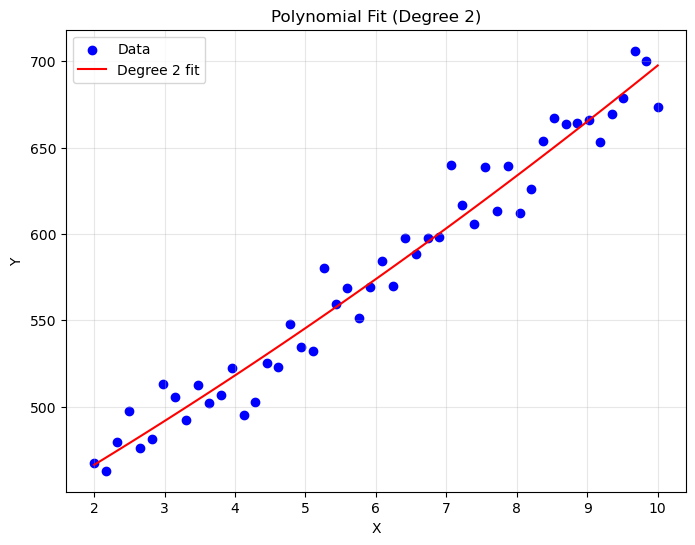

R² score: 0.9628
Classification accuracy: 0.9667


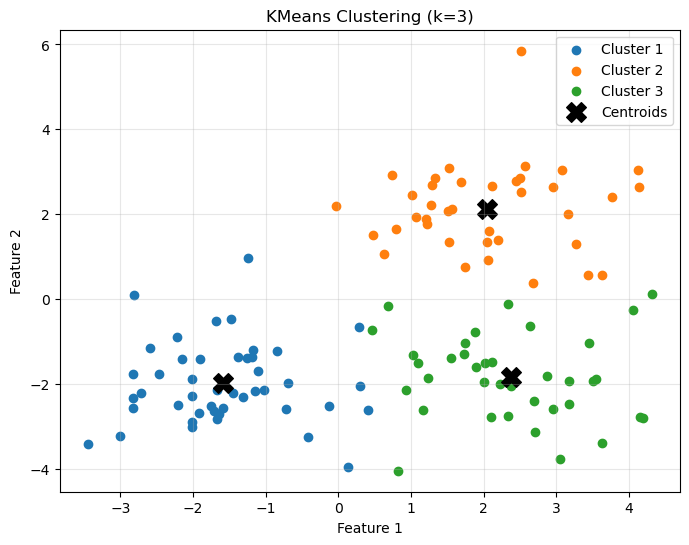

In [3]:
# Generate fake quantum dot data
np.random.seed(42)
sizes = np.linspace(2, 10, 50)
emission = 400 + 30*sizes + np.random.normal(0, 15, 50)  # nm
qd_data = pd.DataFrame({'diameter_nm': sizes, 'emission_nm': emission})

# Run polynomial fitting example
X = qd_data['diameter_nm'].values
y = qd_data['emission_nm'].values
fit_polynomial(X, y, degree=2)

# Generate sample classification data
X_class = np.random.rand(100, 2)  # Two features
y_class = (X_class[:, 0] + X_class[:, 1] > 1).astype(int)  # Simple rule
classifier = classify_points(X_class, y_class)

# Generate sample clustering data
X_cluster = np.vstack([np.random.randn(40, 2) + np.array([2, 2]), 
                       np.random.randn(40, 2) + np.array([-2, -2]),
                       np.random.randn(40, 2) + np.array([2, -2])])
kmeans, clusters = cluster_data(X_cluster, n_clusters=3)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def fit_polynomial(x, y, degree=2):
    """Fit polynomial of specified degree to x,y data"""
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(x_poly, y)
    
    # Generate points for smooth curve
    x_plot = np.linspace(min(x), max(x), 100)
    x_plot_poly = poly.transform(x_plot.reshape(-1, 1))
    y_plot = model.predict(x_plot_poly)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x_plot, y_plot, color='red', label=f'Degree {degree} fit')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Reaction Rate (mol/L·s)')
    plt.legend()
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    y_pred = model.predict(x_poly)
    r2 = r2_score(y, y_pred)
    print(f"R² score: {r2:.4f}")
    
    return model, poly

def classify_points(X, y):
    """Classify points using Random Forest and visualize results"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    print(f"Classification accuracy: {score:.4f}")
    
    # Create a meshgrid for visualization
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create predictions for mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    
    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
    plt.xlabel('Acidity (pH)')
    plt.ylabel('Temperature (°C)')
    plt.title('Chemical Reaction Success Classification')
    
    # Add a legend
    class_names = ['Failed', 'Successful']
    legend1 = plt.legend(scatter.legend_elements()[0], class_names, loc="upper right", title="Reaction Outcome")
    plt.gca().add_artist(legend1)
    
    plt.tight_layout()
    plt.show()
    
    return clf

def cluster_data(X, n_clusters=3):
    """Cluster data using KMeans"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, marker='X', c='black', label='Centroids')
    plt.xlabel('Protein Content (g/100g)')
    plt.ylabel('Sugar Content (g/100g)')
    plt.title(f'Food Product Clustering (k={n_clusters})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return kmeans, clusters

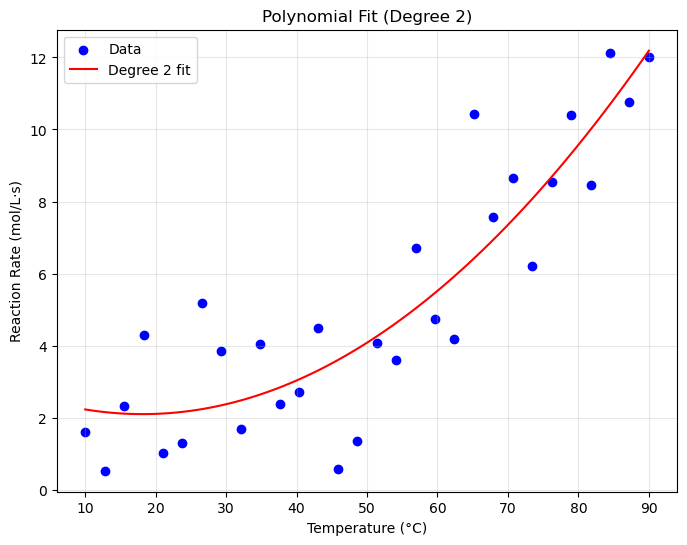

R² score: 0.7956
Classification accuracy: 0.7667


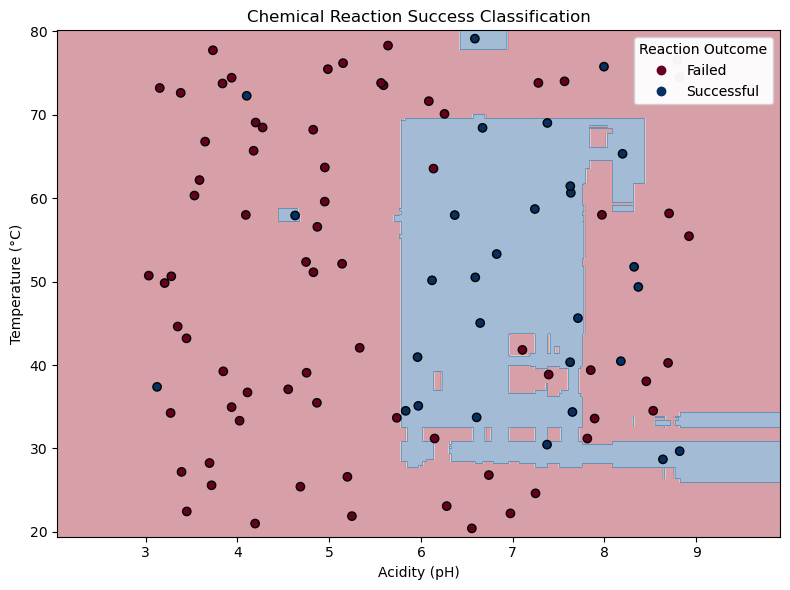

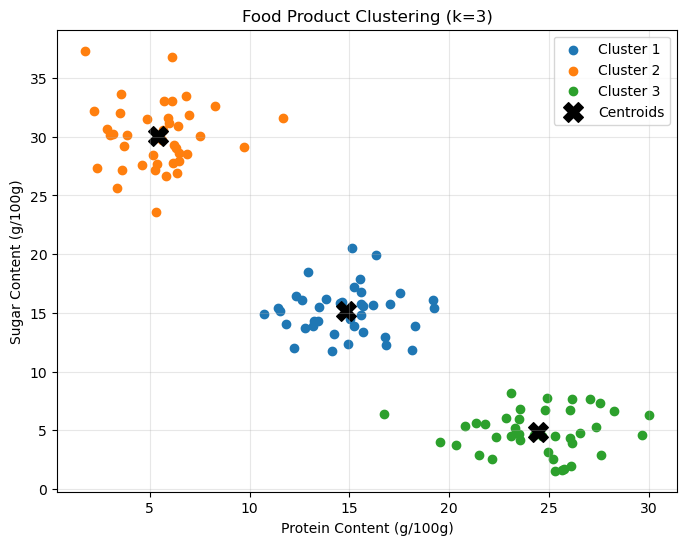

In [5]:
# Generate fake chemistry data for curve fitting
np.random.seed(42)
temperatures = np.linspace(10, 90, 30)  # Temperature in Celsius
reaction_rates = 0.05 * temperatures + 0.001 * temperatures**2 + np.random.normal(0, 2, 30)  # mol/L·s

# Run polynomial fitting example
fit_polynomial(temperatures, reaction_rates, degree=2)

# Generate sample classification data for chemical reactions
np.random.seed(42)
n_samples = 100
acidity = np.random.uniform(3, 9, n_samples)  # pH values
temperature = np.random.uniform(20, 80, n_samples)  # Temperature in Celsius

# Define success criteria: reactions succeed in specific pH and temperature ranges
# For demonstration, we'll use a simple rule
success = ((acidity > 5.5) & (acidity < 8.5) & 
           (temperature > 40) & (temperature < 70)).astype(int)

# Add some noise
indices = np.random.choice(range(n_samples), size=15, replace=False)
success[indices] = 1 - success[indices]  # Flip some labels

X_reactions = np.column_stack([acidity, temperature])
classifier = classify_points(X_reactions, success)

# Generate sample food product data for clustering
np.random.seed(42)
# Cluster 1: High protein, low sugar (e.g., meat products)
cluster1 = np.random.multivariate_normal([25, 5], [[10, 0], [0, 3]], 40)
# Cluster 2: Medium protein, medium sugar (e.g., dairy products)
cluster2 = np.random.multivariate_normal([15, 15], [[5, 0], [0, 5]], 40)
# Cluster 3: Low protein, high sugar (e.g., sugary snacks)
cluster3 = np.random.multivariate_normal([5, 30], [[3, 0], [0, 10]], 40)

food_data = np.vstack([cluster1, cluster2, cluster3])
kmeans, clusters = cluster_data(food_data, n_clusters=3)